## Librerias


In [ ]:
import pandas as pd
import requests
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# 1. Cargar datasets limpios
spotify_df = pd.read_csv("spotify_dataset_clean.csv")
grammy_df = pd.read_csv("the_grammy_awards_clean.csv")

# 2. Unificar columnas necesarias
spotify_tracks = spotify_df[["track_name", "artists"]].drop_duplicates().rename(columns={"artists": "artist_name"})
grammy_tracks = grammy_df[["nominee", "artist"]].dropna().rename(columns={"nominee": "track_name", "artist": "artist_name"})

# 3. Combinar ambos datasets y eliminar duplicados
combined = pd.concat([spotify_tracks, grammy_tracks], ignore_index=True).drop_duplicates()

# 4. Filtrar primeros 150 registros únicos
combined = combined.head(150)

# 5. Configuración del token y API
token = "BQBEa_jBAZFX4BNc-A2701mMzXobgDfxnGyIHyEFdYmbynAOc3Jx4IG_Ac28Kp7krqFu5391WM4emYH7tnOIXnha84jzvZnznwHGOBAb6vOZrd_2LDT2roUM3Jkl9-Ovpbxa-ms_PLg"  
headers = {"Authorization": f"Bearer {token}"}
base_url = "https://api.spotify.com/v1/search"

# 6. Extraer información
data = []

for index, row in combined.iterrows():
    query = f"{row['track_name']} artist:{row['artist_name']}"
    params = {"q": query, "type": "track", "limit": 1}
    response = requests.get(base_url, headers=headers, params=params)

    if response.status_code == 200:
        items = response.json().get("tracks", {}).get("items", [])
        if items:
            track = items[0]
            data.append({
                "track_name": track["name"],
                "artist_name": track["artists"][0]["name"],
                "album_name": track["album"]["name"],
                "release_date": track["album"]["release_date"],
                "duration_ms": track["duration_ms"],
                "popularity": track["popularity"],
                "explicit": track["explicit"],
                "spotify_url": track["external_urls"]["spotify"]
            })
    else:
        print(f"⚠️ Error {response.status_code} en: {row['track_name']} - {row['artist_name']}")
    
    time.sleep(0.2)  # Pausa para evitar bloqueo

# 7. Guardar resultados
df_api = pd.DataFrame(data)
df_api.to_csv("datos_api_spotify_expandido.csv", index=False)
print(" Archivo guardado: datos_api_spotify_expandido.csv con", len(df_api), "registros.")




✅ Archivo guardado: datos_api_spotify_expandido.csv con 149 registros.


🔍 Estructura general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   track_name    149 non-null    object
 1   artist_name   149 non-null    object
 2   album_name    149 non-null    object
 3   release_date  149 non-null    object
 4   duration_ms   149 non-null    int64 
 5   popularity    149 non-null    int64 
 6   explicit      149 non-null    bool  
 7   spotify_url   149 non-null    object
dtypes: bool(1), int64(2), object(5)
memory usage: 8.4+ KB
None

📌 Primeras filas:
                   track_name        artist_name  \
0                      Comedy        Gen Hoshino   
1            Ghost - Acoustic       Ben Woodward   
2              To Begin Again  Ingrid Michaelson   
3  Can't Help Falling In Love       Kina Grannis   
4                     Hold On   Chord Overstreet   

                                          album_name relea

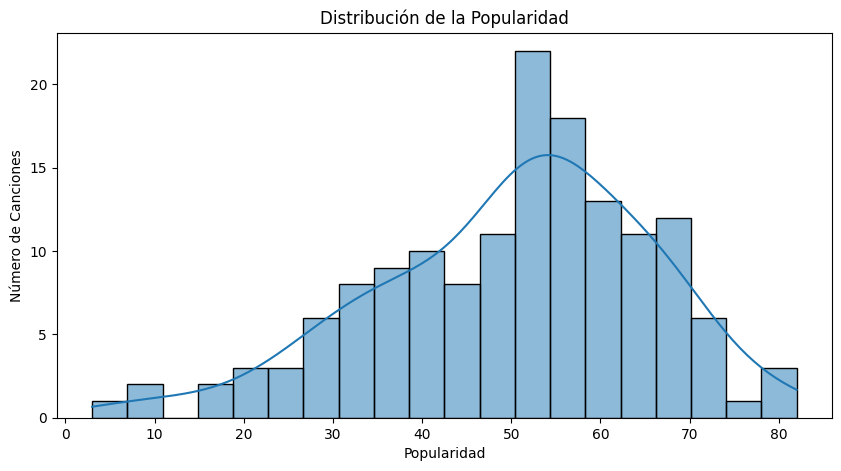

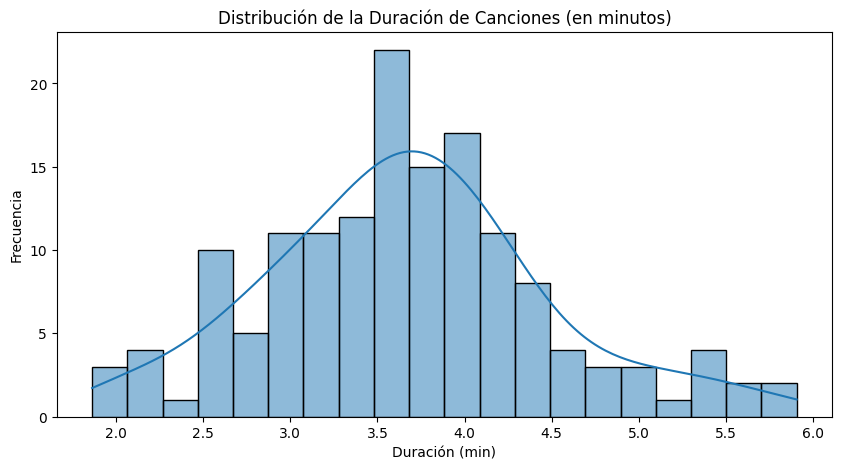

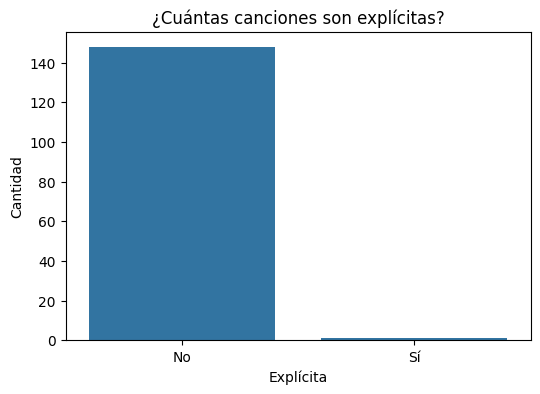

/mnt/d/Universidad/ETL/workshop_02_antonio/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127908 (\N{MICROPHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


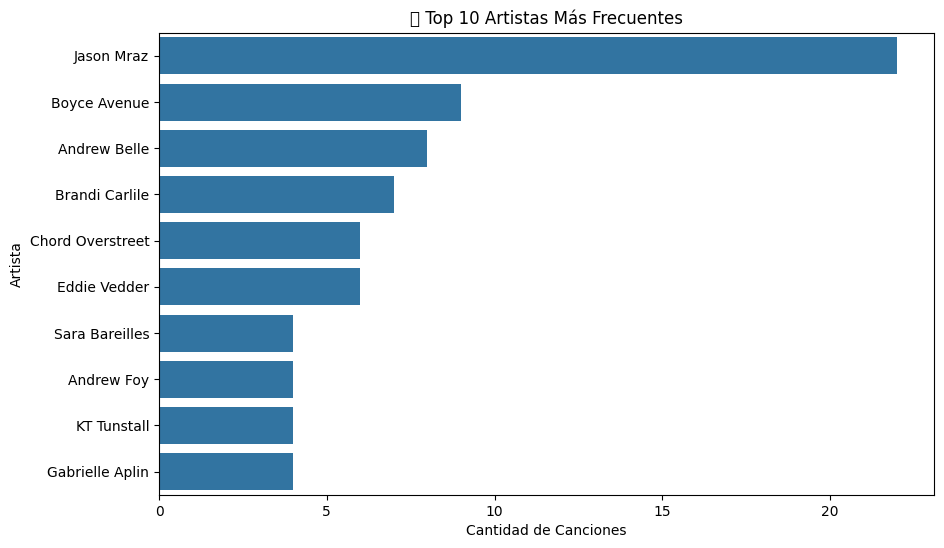

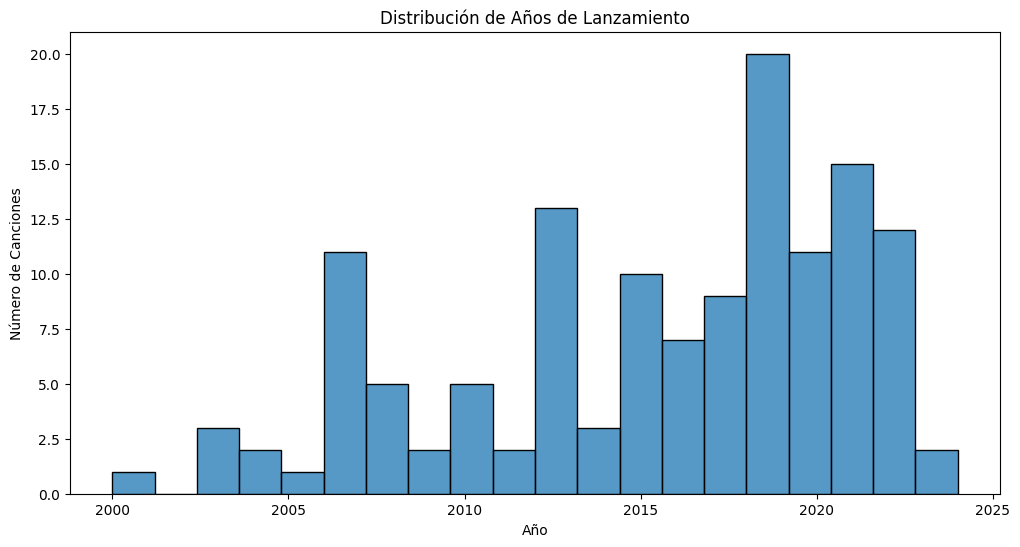

In [ ]:

df_api = pd.read_csv("datos_api_spotify_expandido.csv")

# ------------------------------
# 1. ESTRUCTURA GENERAL
# ------------------------------
print(" Estructura general:")
print(df_api.info())
print("\n Primeras filas:")
print(df_api.head())

# ------------------------------
# 2. VALORES NULOS Y DUPLICADOS
# ------------------------------
print("\n Valores nulos:")
print(df_api.isnull().sum())

print("\n Duplicados:")
print(df_api.duplicated().sum())

# ------------------------------
# 3. DISTRIBUCIÓN DE POPULARIDAD
# ------------------------------
plt.figure(figsize=(10, 5))
sns.histplot(df_api['popularity'], bins=20, kde=True)
plt.title("Distribución de la Popularidad")
plt.xlabel("Popularidad")
plt.ylabel("Número de Canciones")
plt.show()


# 4. DURACIÓN EN MINUTOS

df_api['duration_min'] = df_api['duration_ms'] / 60000

plt.figure(figsize=(10, 5))
sns.histplot(df_api['duration_min'], bins=20, kde=True)
plt.title("Distribución de la Duración de Canciones (en minutos)")
plt.xlabel("Duración (min)")
plt.ylabel("Frecuencia")
plt.show()


# 5. CANCIONES EXPLÍCITAS
plt.figure(figsize=(6, 4))
sns.countplot(x='explicit', data=df_api)
plt.title("¿Cuántas canciones son explícitas?")
plt.xlabel("Explícita")
plt.ylabel("Cantidad")
plt.xticks([0, 1], ["No", "Sí"])
plt.show()


# 6. FRECUENCIA DE ARTISTAS

top_artistas = df_api['artist_name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_artistas.values, y=top_artistas.index)
plt.title("🎤 Top 10 Artistas Más Frecuentes")
plt.xlabel("Cantidad de Canciones")
plt.ylabel("Artista")
plt.show()


# 7. FECHAS DE LANZAMIENTO

df_api['release_date'] = pd.to_datetime(df_api['release_date'], errors='coerce')
df_api['release_year'] = df_api['release_date'].dt.year

plt.figure(figsize=(12, 6))
sns.histplot(df_api['release_year'].dropna(), bins=20, kde=False)
plt.title("Distribución de Años de Lanzamiento")
plt.xlabel("Año")
plt.ylabel("Número de Canciones")
plt.show()


####  Información General

El dataset contiene **149 registros** y **8 columnas**, todas sin valores nulos:

- `track_name`: Nombre de la canción (objeto)
- `artist_name`: Nombre del artista o banda (objeto)
- `album_name`: Álbum al que pertenece la canción (objeto)
- `release_date`: Fecha de lanzamiento del álbum o sencillo (objeto)
- `duration_ms`: Duración en milisegundos (int64)
- `popularity`: Nivel de popularidad en Spotify (int64, de 0 a 100)
- `explicit`: Si la canción contiene lenguaje explícito (bool)
- `spotify_url`: Enlace directo a la canción o artista en Spotify (objeto)

La estructura es limpia, no contiene valores nulos, lo cual facilita el análisis posterior. Sin embargo, se detectaron **2 registros duplicados**, que deberán eliminarse para evitar sesgos en estadísticas y visualizaciones.

####  Observación:
Este dataset será útil para:
- Analizar tendencias de popularidad y duración.
- Filtrar canciones explícitas.
- Evaluar patrones por artista y año de lanzamiento.

La próxima etapa será realizar visualizaciones y cálculos estadísticos para interpretar cada una de estas dimensiones.


####  Distribución de la Popularidad

La popularidad de las canciones en el dataset muestra una **distribución ligeramente asimétrica hacia la izquierda**, con un pico entre los valores 50 y 60. Esto indica que la mayoría de las canciones en esta muestra son **moderadamente populares**, aunque también hay una cantidad considerable de canciones por debajo del 40, y muy pocas con popularidad superior a 75.

Esto puede reflejar que el conjunto incluye tanto artistas consolidados como artistas emergentes o menos conocidos.


####  Duración de las Canciones

La duración de las canciones sigue una distribución normal centrada alrededor de los **3.5 a 4 minutos**, lo cual es consistente con los estándares comerciales actuales de la industria musical. 

La mayoría de las canciones se encuentran entre **3 y 5 minutos**, con muy pocos casos extremos por debajo de 2 minutos o por encima de 5.5. Esta distribución valida que los datos provienen de producciones típicas orientadas a consumo masivo.


####  Canciones con Contenido Explícito

De las 149 canciones analizadas, **solo una** contiene lenguaje explícito. Esto sugiere que el dataset contiene en su mayoría canciones adecuadas para todo público, probablemente influenciado por artistas de géneros más suaves o acústicos.

Esto también puede indicar que el subconjunto consultado de la API incluye artistas que no se caracterizan por el uso de lenguaje fuerte, como es común en géneros pop, indie o folk.


####  Artistas con Mayor Presencia

El artista con más canciones en el dataset es **Jason Mraz**, con más de 20 canciones, seguido por **Boyce Avenue**, **Andrew Belle** y otros artistas del ámbito alternativo o acústico.

Esto revela una posible concentración de resultados en torno a ciertos artistas que tienen múltiples versiones o regrabaciones disponibles en Spotify, lo cual puede sesgar ligeramente los análisis si no se controla por artista.


####  Años de Lanzamiento

La mayoría de las canciones fueron lanzadas entre **2010 y 2023**, con un claro pico en el año **2019**. Esto indica que el dataset extraído está sesgado hacia producciones recientes, lo cual tiene sentido si se considera que la popularidad en Spotify favorece contenidos activos y actuales.

La distribución también muestra algunos lanzamientos entre 2000 y 2010, pero en menor cantidad.
